# *Importing Libraries*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

# *Loading the dataset*

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
permutation = np.random.permutation(x_train.shape[0])
x_train_shuffled = x_train[permutation]
y_train_shuffled = y_train[permutation]
permutation = np.random.permutation(x_test.shape[0])
x_test_shuffled = x_test[permutation]
y_test_shuffled = y_test[permutation]

In [5]:
x_train_shuffled.shape

(60000, 28, 28)

In [6]:
x_test_shuffled.shape

(10000, 28, 28)

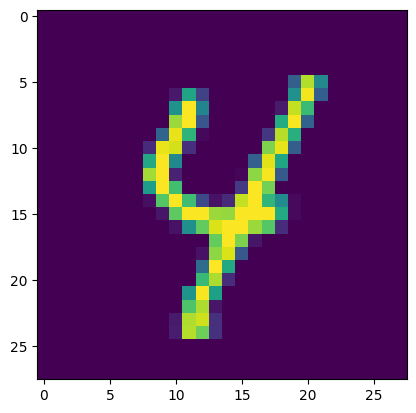

In [7]:
plt.imshow(x_train_shuffled[0])

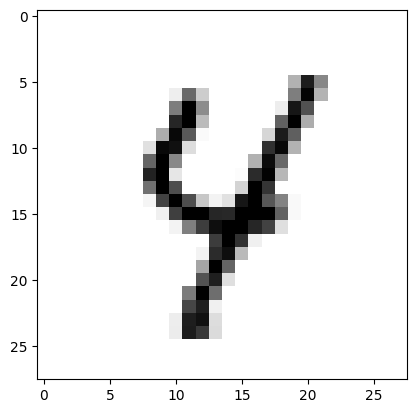

In [9]:
plt.imshow(x_train_shuffled[0],cmap=plt.cm.binary)

In [10]:
print(x_train_shuffled[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  77 226 120   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  17 149  50   0   0   0   0   0
    0 129 251  76   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 130 254 115   0   0   0   0   0
   18 233 174   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 217 254  68   0   0   

# *Normalizing the dataset*

In [11]:
X_train=tf.keras.utils.normalize(x_train_shuffled)
X_test=tf.keras.utils.normalize(x_test_shuffled)

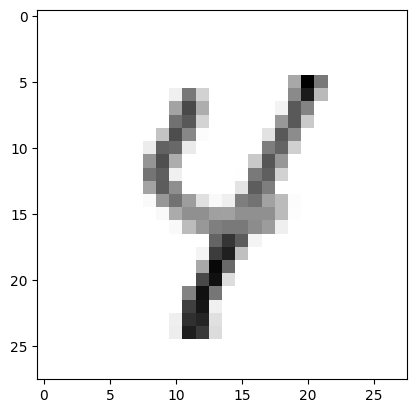

In [12]:
plt.imshow(X_train[0],cmap=plt.cm.binary)

In [13]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# *Resizing the images*

In [14]:
image_Size=28
X_train_resized=np.array(X_train).reshape(-1,image_Size,image_Size,1)
X_test_resized=np.array(X_test).reshape(-1,image_Size,image_Size,1)

In [15]:
print(X_train_resized.shape)
print(X_test_resized.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# *Creating CNN*

In [16]:
model=Sequential()

In [18]:
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=X_train_resized.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Second Conv Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Third Conv Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Dense Layer1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation(tf.nn.relu))
#Dense Layer2
model.add(Dense(32))
model.add(Activation(tf.nn.relu))
#Dense Layer3
model.add(Dense(10))
model.add(Activation(tf.nn.softmax))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

# *Model Training*

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(X_train_resized,y_train_shuffled,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 106s 56ms/step - loss: 0.0338 - accuracy: 0.9903
Epoch 2/15
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0211 - accuracy: 0.9933
Epoch 3/15
1875/1875 [==============================] - 106s 56ms/step - loss: 0.0180 - accuracy: 0.9943
Epoch 4/15
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0144 - accuracy: 0.9956
Epoch 5/15
1875/1875 [==============================] - 106s 57ms/step - loss: 0.0156 - accuracy: 0.9955
Epoch 6/15
1875/1875 [==============================] - 110s 59ms/step - loss: 0.0132 - accuracy: 0.9954
Epoch 7/15
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0133 - accuracy: 0.9957
Epoch 8/15
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0107 - accuracy: 0.9967
Epoch 9/15
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0123 - accuracy: 0.9960
Epoch 10/15
1875/1875 [==============================] 

#*Model Evaluation*

In [25]:
test_loss,test_acc = model.evaluate(X_test_resized,y_test_shuffled)
print(test_loss)
print(test_acc)

313/313 [==============================] - 6s 19ms/step - loss: 0.0940 - accuracy: 0.9835
0.09404899179935455
0.9835000038146973


In [26]:
prediction=model.predict([X_test_resized])

313/313 [==============================] - 8s 24ms/step


In [27]:
print(prediction)

[[1.04168031e-12 6.16127327e-09 1.72120917e-15 ... 2.31425786e-16
  2.33279991e-07 2.48679660e-10]
 [5.69554525e-15 9.15587273e-10 6.22331072e-07 ... 9.99999344e-01
  1.36952776e-11 1.33485312e-08]
 [1.32503860e-28 7.96703760e-24 1.19173824e-19 ... 7.71609689e-29
  9.99999940e-01 3.41037444e-22]
 ...
 [8.04546939e-16 9.99999940e-01 4.07605590e-12 ... 2.19637117e-14
  1.88457056e-10 1.50551669e-18]
 [2.64571542e-09 9.99967515e-01 4.14626555e-09 ... 3.15077492e-10
  4.85918065e-07 6.74450784e-13]
 [1.21244540e-13 1.47925546e-18 9.99999940e-01 ... 2.42744103e-10
  6.81878590e-15 3.75418067e-19]]


In [28]:
print(np.argmax(prediction[0]))

6


AxesImage(size=(28, 28))


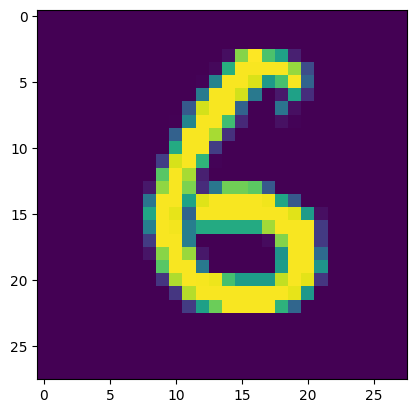

In [29]:
print(plt.imshow(x_test_shuffled[0]))

# *Saving Model*

In [31]:
model.save('Trained_model_cnn.h5')